2021.03.30
Load csv file & preprocessing the dataset

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


Obesity data preprocessing

In [ ]:
import io
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Load obesity csv file
obesity_file = '/content/drive/MyDrive/Recommendation/obesity_dataset.csv'
obesity_data = pd.read_csv(obesity_file)

#remove columns in obesity_data
obesity_data = obesity_data.drop(['id'], axis=1)
obesity_data.info()
obesity_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Change NObeyesdad values for 4 type : Insufficient_weight, Normal_weight, Over_weight, Obesity
obesity_data.replace(['Overweight_Level_I', 'Overweight_Level_II'], 'Over_weight', inplace = True)
obesity_data.replace(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',], 'Obesity', inplace = True)
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Over_weight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Over_weight


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# change object columns to numerical value with labelEncoder
obesity_data['Gender'] = le.fit_transform(obesity_data['Gender'])
obesity_data['family_history_with_overweight'] = le.fit_transform(obesity_data['family_history_with_overweight'])
obesity_data['FAVC'] = le.fit_transform(obesity_data['FAVC'])
obesity_data['CAEC'] = le.fit_transform(obesity_data['CAEC'])
obesity_data['SMOKE'] = le.fit_transform(obesity_data['SMOKE'])
obesity_data['SCC'] = le.fit_transform(obesity_data['SCC'])
obesity_data['CALC'] = le.fit_transform(obesity_data['CALC'])
obesity_data['MTRANS'] = le.fit_transform(obesity_data['MTRANS'])
obesity_data['NObeyesdad'] = le.fit_transform(obesity_data['NObeyesdad'])
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,3
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3


In [ ]:
from sklearn.preprocessing import StandardScaler

# split the dataframe data and target columns
X = obesity_data[obesity_data.columns.difference(['NObeyesdad'])]
y = obesity_data['NObeyesdad']

# Sclaed the obesity data with standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.52212439  0.30034556  1.4191716  ...  0.56199675 -0.86255819
   0.47229133]
 [-0.52212439  0.30034556 -0.52115952 ... -1.08062463 -1.16807699
   0.47229133]
 [-0.20688898  0.30034556 -2.46149063 ...  0.56199675 -0.36609013
   0.47229133]
 ...
 [-0.28190933  0.30034556 -0.52115952 ... -0.01901815  1.79886776
   0.47229133]
 [ 0.00777624  0.30034556 -0.52115952 ... -0.11799101  1.78577968
   0.47229133]
 [-0.10211908  0.30034556 -0.52115952 ...  0.09243207  1.7905916
   0.47229133]]


In [ ]:
from sklearn.model_selection import train_test_split

# split dataset to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

In [ ]:
# 변수 별 영향력 도출 - logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

log_rg = LogisticRegression().fit(X_train, y_train)
cross_val_score(log_rg, X_train, y_train, cv = 5)
print(log_rg.score(X_test, y_test))
#print(classification_report(y_test, log_rg.predict(X_test)))

feature_importance_lr = pd.DataFrame(zip(X.columns.values, log_rg.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending = False, inplace = True)
print(feature_importance_lr)

0.9463722397476341
                           feature      coef
8                           Height  2.651069
6                             FCVC  0.336893
10                             NCP  0.130260
13                             TUE  0.121739
3                             CH2O  0.082819
11                             SCC  0.005067
4                              FAF -0.025009
2                             CALC -0.054442
7                           Gender -0.076427
9                           MTRANS -0.110680
5                             FAVC -0.154407
0                              Age -0.208877
15  family_history_with_overweight -0.303188
1                             CAEC -0.326420
12                           SMOKE -0.433248
14                          Weight -9.681616


In [ ]:
obesity_data = obesity_data.drop(['FAF', 'CALC', 'Gender', 'MTRANS', 'FAVC', 'Age', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'Weight'], axis=1)
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Height      2111 non-null   float64
 1   FCVC        2111 non-null   float64
 2   NCP         2111 non-null   float64
 3   CH2O        2111 non-null   float64
 4   SCC         2111 non-null   int64  
 5   TUE         2111 non-null   float64
 6   NObeyesdad  2111 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 115.6 KB


Obesity data groupize with knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# apply knn classifer with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('Accuracy Score : ', knn.score(X_test, y_test))

# add new column with the result of knn named obesity
obesity_data.drop(['NObeyesdad'], axis=1, inplace = True)
obesity_data['obesity'] = knn.predict(X_scaled)
obesity_data.head()

Accuracy Score :  0.8406940063091483


,Height,FCVC,NCP,CH2O,SCC,TUE,obesity
0,1.62,2.0,3.0,2.0,0,1.0,3
1,1.52,3.0,3.0,3.0,1,0.0,1
2,1.80,2.0,3.0,2.0,0,1.0,3
3,1.80,3.0,3.0,2.0,0,0.0,1
4,1.78,2.0,1.0,2.0,0,0.0,3


Exercise data preprocessing

In [ ]:
# load exercise data
exercise_file = '/content/drive/MyDrive/Recommendation/exercise_dataset.csv'
exercise_data = pd.read_csv(exercise_file)
exercise_data = exercise_data.drop(['130 lb', '155 lb', '180 lb', '205 lb'], axis=1)
exercise_data.info()
exercise_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  248 non-null    object 
 1   Calories per kg                       248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,"Activity, Exercise or Sport (1 hour)",Calories per kg
0,"Cycling, mountain bike, bmx",1.750730
1,"Cycling, <10 mph, leisure bicycling",0.823236
2,"Cycling, >20 mph, racing",3.294974
3,"Cycling, 10-11.9 mph, light",1.234853
4,"Cycling, 12-13.9 mph, moderate",1.647825


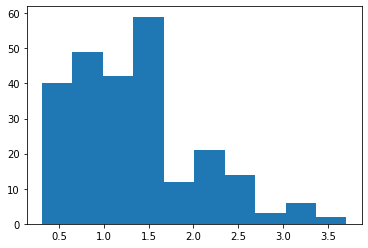

In [ ]:
import matplotlib.pyplot as plt

plt.hist(exercise_data['Calories per kg'], bins = 10)
plt.show()

Classify the exercise_data with 4 groups

In [ ]:
levels = [1,2,3,4,5]
ranges = [0.31, 0.82, 1.33, 2.01, 2.69, 3.71]
exercise_data['level'] = pd.cut(exercise_data['Calories per kg'], ranges, right = True, labels=levels)
exercise_data.tail()

,"Activity, Exercise or Sport (1 hour)",Calories per kg,level
243,General cleaning,0.721008,1
244,"Cleaning, dusting",0.515199,1
245,Taking out trash,0.617427,1
246,"Walking, pushing a wheelchair",0.823236,2
247,"Teach physical education,exercise class",0.823236,2


In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

represent_data = exercise_data['level'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = represent_data.index, 
               text = ['{:.1f} %'.format(val) for val in (represent_data.values / exercise_data.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = represent_data.values)
layout = dict(title = 'Distribution of Exercise_data level',
              xaxis = dict(title = 'Level'),
              yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Make rating matrix with matrix multiply

In [ ]:
user_id = obesity_data.index.tolist()
exercise_id = exercise_data['Activity, Exercise or Sport (1 hour)'].tolist()
rating = pd.DataFrame(columns = ['user', 'exercise', 'rating'], index = range(len(user_id)*len(exercise_id)))
k = 0
for i in range(len(user_id)) :
    for j in range(len(exercise_id)) :
        rating.iloc[k]['user'] = user_id[i] + 1
        rating.iloc[k]['exercise'] = exercise_id[j]
        k += 1

user_level = obesity_data['obesity'].tolist()
item_level = exercise_data['level'].tolist()
k = 0
for i in range(len(user_level)):
    for j in range(len(item_level)) :
        rating.iloc[k]['rating'] =  5 - abs(user_level[i] - item_level[j])
        k +=1
rating

,user,exercise,rating
0,1,"Cycling, mountain bike, bmx",5
1,1,"Cycling, <10 mph, leisure bicycling",4
2,1,"Cycling, >20 mph, racing",3
3,1,"Cycling, 10-11.9 mph, light",4
4,1,"Cycling, 12-13.9 mph, moderate",5
...,...,...,...
523523,2111,General cleaning,4
523524,2111,"Cleaning, dusting",4
523525,2111,Taking out trash,4
523526,2111,"Walking, pushing a wheelchair",5


SVD with suprise

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 3.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617553 sha256=3ce655ded36cacd68e04955487e5bc0ed307cba9ea22f0bca769b6b6c5d0b623
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


SVD declare

In [ ]:
from surprise import Reader, Dataset
from surprise import SVD

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating[['user', 'exercise', 'rating']], reader = reader)

Small learning rate values

In [ ]:
from surprise import accuracy
from surprise.model_selection import train_test_split
import numpy as np

epochs = [5, 10, 15, 20]
lr = [0.0001, 0.0003, 0.0005, 0.0007, 0.0009]
final = []
rmse = []
for epoch in epochs :
  for lr_value in lr :
    print('Epoch :', epoch, 'lr :', lr_value)
    train, test = train_test_split(data, test_size=0.3, random_state=10)
    model = SVD(n_epochs=epoch, lr_all = lr_value)
    model.fit(train)
    predictions = model.test(test)
    rmse_value = accuracy.rmse(predictions) #uid : 사용자 아이디, iid : 운동 이름, r_ui : 실제 평점, est : 예측 평점
    print(rmse_value)
    rmse.append(rmse_value)

    #Calculate TP,FP,TN,FN at every threshold level (0.0 - 5.0)
    threshold = 4
    tp, fn, fp, tn = 0, 0, 0, 0
    temp = []

    for uid, iid, true_r, est, _ in predictions:
        if true_r>=threshold :
            if est>=threshold :
                tp = tp+1
            else:
                fn = fn+1
        else:
            if est>=threshold :
                fp = fp+1
            else:
                tn = tn+1
    if tp == 0:
          precision, recall, f1, Accuracy, Sens = 0, 0, 0, 0, 0
    else:
          precision = tp / (tp + fp)
          recall = tp / (tp + fn)
          f1 = 2 * (precision * recall) / (precision + recall)
          Accuracy = (tp + tn) / (tp + tn + fp + fn)
 
    temp = [epoch, lr_value, precision, recall, f1, Accuracy]
    final.append(temp)
results = pd.DataFrame(final)
results.rename(columns={0:'n_epochs', 1:'lr_all', 2: 'Precision', 3: 'Recall', 4:'F1', 5:'Accuracy'}, inplace=True)

print(results)
sum = 0
for i in rmse :
  sum += i
print('rmse average : ', sum/len(rmse))

Epoch : 5 lr : 0.0001
RMSE: 0.8631
0.8631458037242025
Epoch : 5 lr : 0.0003
RMSE: 0.7686
0.7686014086567866
Epoch : 5 lr : 0.0005
RMSE: 0.7300
0.7300218811750924
Epoch : 5 lr : 0.0007
RMSE: 0.7023
0.7022570123136561
Epoch : 5 lr : 0.0009
RMSE: 0.6794
0.6794361420290352
Epoch : 10 lr : 0.0001
RMSE: 0.8004
0.8003766428435555
Epoch : 10 lr : 0.0003
RMSE: 0.7155
0.7155157911676209
Epoch : 10 lr : 0.0005
RMSE: 0.6679
0.6678722665108233
Epoch : 10 lr : 0.0007
RMSE: 0.6189
0.618878495248309
Epoch : 10 lr : 0.0009
RMSE: 0.5441
0.5440797860979837
Epoch : 15 lr : 0.0001
RMSE: 0.7691
0.7690921161830235
Epoch : 15 lr : 0.0003
RMSE: 0.6791
0.679077390795144
Epoch : 15 lr : 0.0005
RMSE: 0.6005
0.6004689994116108
Epoch : 15 lr : 0.0007
RMSE: 0.4903
0.49033304054017396
Epoch : 15 lr : 0.0009
RMSE: 0.3044
0.3043520889913568
Epoch : 20 lr : 0.0001
RMSE: 0.7475
0.7474974135848682
Epoch : 20 lr : 0.0003
RMSE: 0.6449
0.6448557950636573
Epoch : 20 lr : 0.0005
RMSE: 0.4907
0.49065230612506555
Epoch : 20 lr :

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs' : [5, 10, 15, 20], 
              'n_factors' : [10, 50, 100], 
              'lr_all' : [0.0001, 0.0003, 0.0005, 0.0007, 0.0009], 
              'reg_all' : [0.005, 0.01, 0.015, 0.02]}
gs = GridSearchCV(model, param_grid, measures=['RMSE', 'MAE'], cv = 3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Cross Validation

In [ ]:
from surprise.model_selection import cross_validate

cross_validate(model, data, measures=['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0935  0.0906  0.0877  0.0913  0.0919  0.0910  0.0019  
MAE (testset)     0.0384  0.0378  0.0372  0.0378  0.0380  0.0378  0.0004  
Fit time          15.54   15.98   16.19   15.82   15.97   15.90   0.21    
Test time         1.50    1.42    1.43    1.00    1.43    1.36    0.18    


{'fit_time': (15.543396949768066,
  15.984617233276367,
  16.19131302833557,
  15.820066213607788,
  15.965675354003906),
 'test_mae': array([0.03837472, 0.03778557, 0.03719364, 0.03783902, 0.03798301]),
 'test_rmse': array([0.09347131, 0.0906282 , 0.08774438, 0.09133501, 0.09187112]),
 'test_time': (1.5006225109100342,
  1.418475866317749,
  1.4272685050964355,
  0.9979650974273682,
  1.4348475933074951)}

##End 